# Importing Required Libraries

In [352]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# Importing the Dataset

In [353]:
#read the bitcoin price dataset
# dateparser = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
bitcoin_price = pd.read_csv(filepath_or_buffer='cryptocurrencypricehistory/bitcoin_price.csv')
ethereum_price = pd.read_csv(filepath_or_buffer='cryptocurrencypricehistory/ethereum_price.csv')
ripple_price = pd.read_csv(filepath_or_buffer='cryptocurrencypricehistory/ripple_price.csv')
iota_price = pd.read_csv(filepath_or_buffer='cryptocurrencypricehistory/iota_price.csv')
litecoin_price = pd.read_csv(filepath_or_buffer='cryptocurrencypricehistory/litecoin_price.csv')
monero_price = pd.read_csv(filepath_or_buffer='cryptocurrencypricehistory/monero_price.csv')

In [354]:
ethereum_price

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",298.570000,304.840000,290.770000,294.660000,"540,766,000","28,533,300,000"
1,"Nov 06, 2017",296.430000,305.420000,293.720000,298.890000,"579,359,000","28,322,700,000"
2,"Nov 05, 2017",300.040000,301.370000,295.120000,296.260000,"337,658,000","28,661,500,000"
3,"Nov 04, 2017",305.480000,305.480000,295.800000,300.470000,"416,479,000","29,175,300,000"
4,"Nov 03, 2017",288.500000,308.310000,287.690000,305.710000,"646,340,000","27,547,400,000"
5,"Nov 02, 2017",290.730000,293.910000,281.170000,287.430000,"904,901,000","27,754,200,000"
6,"Nov 01, 2017",305.760000,306.400000,290.580000,291.690000,"553,864,000","29,183,600,000"
7,"Oct 31, 2017",307.380000,310.550000,305.880000,305.880000,"369,583,000","29,331,500,000"
8,"Oct 30, 2017",304.780000,310.500000,304.350000,307.750000,"331,442,000","29,077,600,000"
9,"Oct 29, 2017",296.380000,313.750000,296.380000,305.090000,"551,752,000","28,270,200,000"


In [355]:
currency_dict = {
    "bitcoin" : bitcoin_price,
    "ethereum" : ethereum_price,
    "ripple" : ripple_price,
    "iota" : iota_price,
    "litecoin" : litecoin_price,
    "monero" : monero_price
}

In [356]:
currency_dict["bitcoin"].head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [357]:
bitcoin_data = currency_dict["bitcoin"][['Date', 'Close']]
ethereum_data = currency_dict["ethereum"][['Date', 'Close']]
ripple_data = currency_dict["ripple"][['Date', 'Close']]
iota_data = currency_dict["iota"][['Date', 'Close']]
litecoin_data = currency_dict["litecoin"][['Date', 'Close']]
monero_data = currency_dict["monero"][['Date', 'Close']]

In [358]:
currency_data = {
    "bitcoin" : bitcoin_data,
    "ethereum" : ethereum_data,
    "ripple" : ripple_data,
    "iota" : iota_data,
    "litecoin" : litecoin_data,
    "monero" : monero_data
}

In [359]:
currency_data['bitcoin'].head(5)

,Date,Close
0,"Nov 07, 2017",7144.38
1,"Nov 06, 2017",7022.76
2,"Nov 05, 2017",7407.41
3,"Nov 04, 2017",7379.95
4,"Nov 03, 2017",7207.76



# Data Exploration

In [360]:
#converting date format from string to datetime
# bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
for currency in currency_data:
    currency_data[currency].loc[0:, 'Date'] = pd.to_datetime(currency_data[currency]['Date'])
# bitcoin_data.loc[0:, 'Date'] = pd.to_datetime(bitcoin_data['Date'])

In [361]:
bitcoin_data['Close'].dtypes

dtype('float64')

In [362]:
bitcoin_ts = currency_data['bitcoin'].set_index('Date')
ethereum_ts = currency_data['ethereum'].set_index('Date')
ripple_ts = currency_data['ripple'].set_index('Date')
iota_ts = currency_data['iota'].set_index('Date')
litecoin_ts = currency_data['litecoin'].set_index('Date')
monero_ts = currency_data['monero'].set_index('Date')

In [363]:
currency_time_series = {
    "bitcoin" : bitcoin_ts,
    "ethereum" : ethereum_ts,
    "ripple" : ripple_ts,
    "iota" : iota_ts,
    "litecoin" : litecoin_ts,
    "monero" : monero_ts,
}

In [364]:
bitcoin_ts.head(5)

,Close
Date,
2017-11-07,7144.38
2017-11-06,7022.76
2017-11-05,7407.41
2017-11-04,7379.95
2017-11-03,7207.76


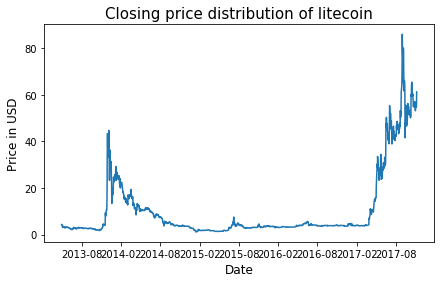

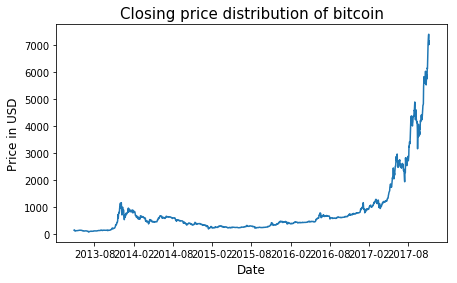

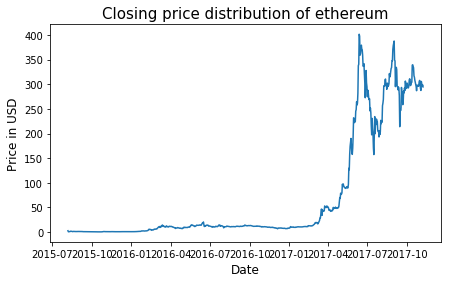

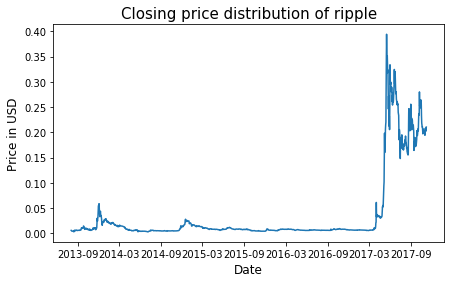

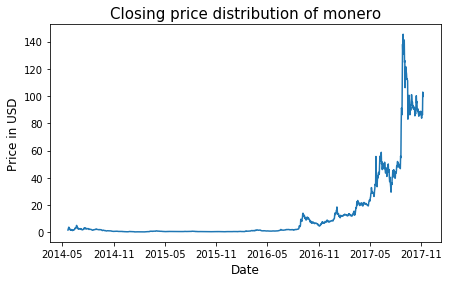

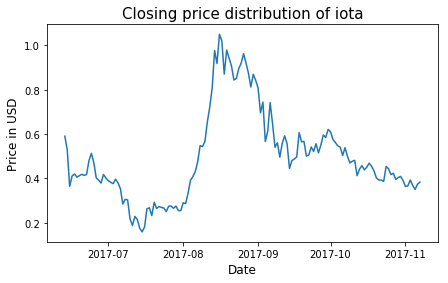

In [365]:
#Closing price visualization
for ts in currency_time_series:
#     plt.subplot(2, 2, 2)
#     plt.subplots(1, 2, figsize=(20, 4))
    fig, ax = plt.subplots(figsize=(7,4))
    plt.plot(currency_time_series[ts])
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    title_str = "Closing price distribution of " + ts
    plt.title(title_str, fontsize=15)
    plt.show()
#     plt.plot(currency_time_series[ts])


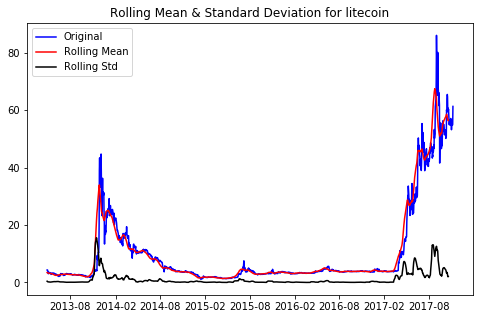

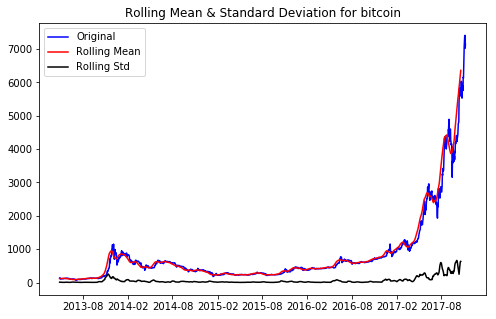

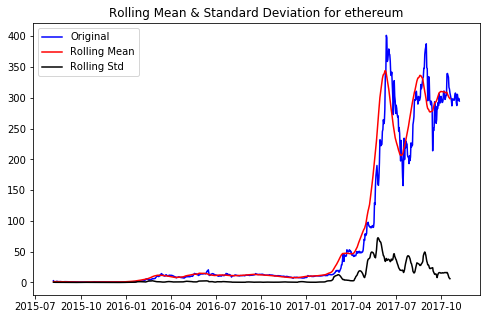

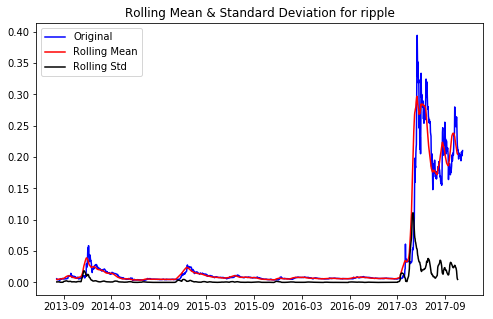

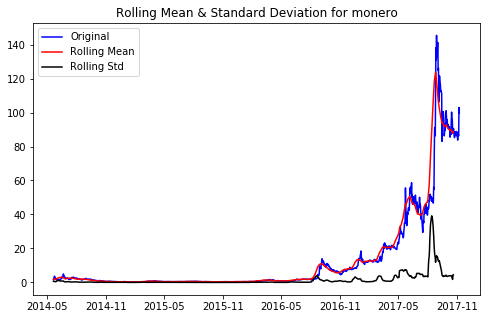

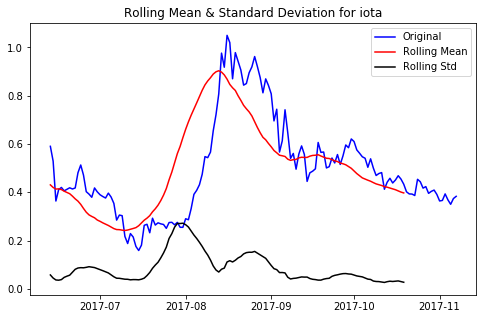

In [366]:
#Calculating rolling statistics to check for a trend/seasonality
for ts in currency_time_series:
    rolling_mean = currency_time_series[ts].rolling(window=20,center=False).mean()
    rolling_std = currency_time_series[ts].rolling(window=20,center=False).std()

    #Plot rolling statistics:
    fig, ax = plt.subplots(figsize=(8,5))
    orig = plt.plot(currency_time_series[ts], color='blue',label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for ' + ts)
    plt.show(block=False)

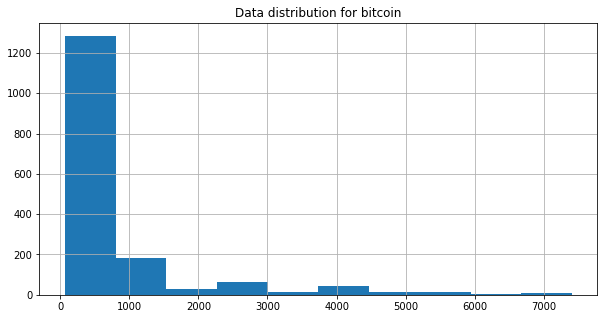

In [367]:
#Visualizing data distribution to check for Stationarity (bitcoin data used)
currency_time_series['bitcoin']['Close'].hist()
plt.title('Data distribution for bitcoin')
plt.show()

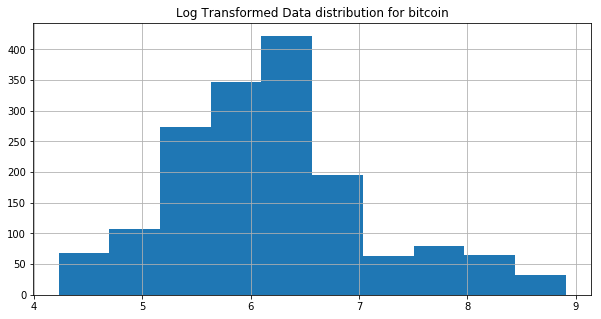

In [368]:
#transforming the data and checking for the Stationarity (bitcoin data used)
bitcoin_log = np.log(currency_time_series['bitcoin'])
bitcoin_log['Close'].hist()
plt.title('Log Transformed Data distribution for bitcoin')
plt.show()

## Correlation between different Crypto-Currencies

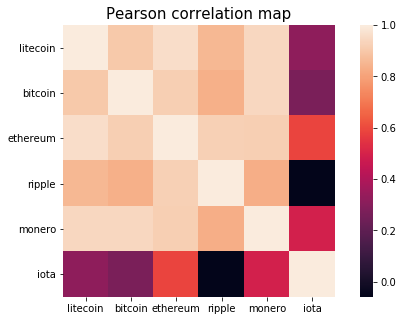

,litecoin,bitcoin,ethereum,ripple,monero,iota
litecoin,1.000000,0.904051,0.962553,0.855779,0.945625,0.320551
bitcoin,0.904051,1.000000,0.918092,0.835094,0.945622,0.269438
ethereum,0.962553,0.918092,1.000000,0.924108,0.917477,0.589040
ripple,0.855779,0.835094,0.924108,1.000000,0.833508,-0.058567
monero,0.945625,0.945622,0.917477,0.833508,1.000000,0.494532
iota,0.320551,0.269438,0.589040,-0.058567,0.494532,1.000000


In [369]:
df = pd.DataFrame() 
currency_name = []
df['Date'] = currency_dict['bitcoin'].Date 
df = df[df['Date']>'2017-05-01']
for currency in currency_dict:
    currency_name.append(currency)
    temp_df = currency_dict[currency]
    df[currency] = temp_df[temp_df['Date']>'2017-05-01'].Close

temp_df = df[currency_name]
corrmat = temp_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(9, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Pearson correlation map", fontsize=15)
plt.show()
temp_df.corr(method='pearson')

# Data Preprocessing

##### Converting the date column from string to Datetime format for further processing. Finding correlation between different features and removing the highly correlated features. Removing stationarity by taking log transformation of data for some algorithms


In [370]:
bitcoin_price.loc[0:, 'Date'] = pd.to_datetime(bitcoin_price['Date'])

In [371]:
bitcoin_price = bitcoin_price.set_index('Date')

In [372]:
bitcoin_price.head(5)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-11-07,7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
2017-11-06,7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2017-11-05,7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
2017-11-04,7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
2017-11-03,7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [373]:
def remove_missing_data(data):
    return data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [374]:
def preprocess(data):
    data = remove_missing_data(data)
    data.loc[0:, 'Date'] = pd.to_datetime(data['Date'])
    volume_new = []
    market_cap = []
    x = 10.0
    for item in data.Volume:
        x = item.replace(',',"")
        x = x.replace('-',"nan")
        x = x.replace(' -',"nan")
        x = x.replace(' ',"")
        x = x.replace('',"")
        volume_new.append(float(x))
    for item in data["Market Cap"]:
        x = item.replace(',',"")
        x = x.replace('-',"nan")
        x = x.replace(' -',"nan")
        x = x.replace(' ',"")
        x = x.replace('',"")
        market_cap.append(float(x))
    data['Volume_new'] = volume_new
    data['Market_Cap_new'] = market_cap
    data = data.drop(['Volume', 'Market Cap'], axis=1)
    data = data.set_index('Date')
    return data

In [375]:
#correlation between different features
original_data = currency_dict['bitcoin']
preprocessed_data = preprocess(original_data)
corrmat = preprocessed_data.corr(method='spearman')

In [376]:
corrmat

,Open,High,Low,Close,Volume_new,Market_Cap_new
Open,1.000000,0.998521,0.998032,0.997596,0.689706,0.992001
High,0.998521,1.000000,0.996769,0.998676,0.697490,0.989171
Low,0.998032,0.996769,1.000000,0.998472,0.683732,0.992202
Close,0.997596,0.998676,0.998472,1.000000,0.691739,0.989830
Volume_new,0.689706,0.697490,0.683732,0.691739,1.000000,0.746939
Market_Cap_new,0.992001,0.989171,0.992202,0.989830,0.746939,1.000000


#### As the features are highly correlated, we can just choose any one feature (we chose "Close") to predict.

In [377]:
#final dataset
bitcoin_final = bitcoin_price['Close']

In [378]:
bitcoin_final.head(5)

Date
2017-11-07    7144.38
2017-11-06    7022.76
2017-11-05    7407.41
2017-11-04    7379.95
2017-11-03    7207.76
Name: Close, dtype: float64

# Data Modelling

In [379]:
#splitting the data into test and train
def split_data(data):
    splitIndex = int(np.floor(data.shape[0]*0.90))
    trainDataset, testDataset = data[:splitIndex], data[splitIndex:]
    return (trainDataset, testDataset)

## Support Vector Regressor

In [380]:
currency_dict['bitcoin'].columns

Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume', u'Market Cap'], dtype='object')

In [344]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

def normalization(data):
    scalar = MinMaxScaler()
    result = scalar.fit_transform(data)
    return result

/Users/manika/anaconda3/envs/bit/lib/python2.7/site-packages/ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/manika/anaconda3/envs/bit/lib/python2.7/site-packages/ipykernel_launcher.py:25: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


('MSE using Support Vector Regressor: ', 0.002157253233870342)


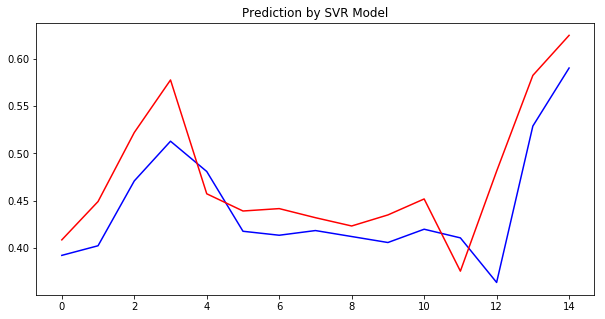

In [346]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import time
import datetime

original_data = currency_dict['iota']
preprocessData = preprocess(original_data)
preprocessData1 = remove_missing_data(preprocessData)

date = preprocessData1.index
date_final = []
for item in date:
    y = int(10000*item.year + 1000*item.month + item.day)
    date_final.append(y)

preprocessData1['Date'] = date_final

X_final = preprocessData1[['Open', 'High', 'Low', 'Volume_new', 'Market_Cap_new', 'Date']]
y_final = preprocessData1['Close']

x_train, x_test = split_data(X_final)
y_train, y_test = split_data(y_final)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

scalarX = RobustScaler()
normalized_train_x = scalarX.fit_transform(x_train)
normalized_test_x = scalarX.transform(x_test)

scalarY = RobustScaler()
normalized_train_y = scalarY.fit_transform(y_train)
normalized_test_y = scalarY.transform(y_test)

svm = SVR(C=1.0, epsilon=0.2)
svm.fit(normalized_train_x, normalized_train_y)

predictions = svm.predict(normalized_test_x)
predictions = predictions.reshape(-1, 1)
predictions_final = scalarY.inverse_transform(predictions)
predictions_final

mse = mean_squared_error(y_test, predictions_final)
print ("MSE using Support Vector Regressor: ", mse)


plt.plot(y_test, color='blue')
plt.plot(predictions_final, color='red')
plt.title("Prediction by SVR Model")
plt.show()

In [384]:
def svr(data):
    preprocessData = preprocess(data)
    preprocessData1 = remove_missing_data(preprocessData)

    date = preprocessData1.index
    date_final = []
    for item in date:
        y = int(10000*item.year + 1000*item.month + item.day)
        date_final.append(y)

    preprocessData1['Date'] = date_final

    X_final = preprocessData1[['Open', 'High', 'Low', 'Volume_new', 'Market_Cap_new', 'Date']]
    y_final = preprocessData1['Close']

    x_train, x_test = split_data(X_final)
    y_train, y_test = split_data(y_final)

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scalarX = RobustScaler()
    normalized_train_x = scalarX.fit_transform(x_train)
    normalized_test_x = scalarX.transform(x_test)

    scalarY = RobustScaler()
    normalized_train_y = scalarY.fit_transform(y_train)
    normalized_test_y = scalarY.transform(y_test)

    svm = SVR(C=1.0, epsilon=0.2)
    svm.fit(normalized_train_x, normalized_train_y)

    predictions = svm.predict(normalized_test_x)
    predictions = predictions.reshape(-1, 1)
    predictions_final = scalarY.inverse_transform(predictions)
    predictions_final

    mse = mean_squared_error(y_test, predictions_final)
    return mse

In [385]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import time
import datetime

for currency in currency_dict:
    original_data = currency_dict[currency]
    mse = svr(original_data)
    print ("MSE using Support Vector Regressor for " + currency + " :", mse) 

/Users/manika/anaconda3/envs/bit/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/manika/anaconda3/envs/bit/lib/python2.7/site-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/manika/anaconda3/envs/bit/lib/python2.7/site-packages/ipykernel_launcher.py:20: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


('MSE using Support Vector Regressor for litecoin :', 174.49662032831162)
('MSE using Support Vector Regressor for bitcoin :', 56946.187329831271)
('MSE using Support Vector Regressor for ethereum :', 396.03328314156391)
('MSE using Support Vector Regressor for ripple :', 0.0042997962018092566)
('MSE using Support Vector Regressor for monero :', 31.717852495895283)
('MSE using Support Vector Regressor for iota :', 0.002157253233870342)


## FB Prophet

In [387]:
from fbprophet import Prophet

In [388]:
dataProphet = currency_dict['ethereum']
dataProphet = dataProphet.reset_index()

In [389]:
dataProphetRed = dataProphet[['Date', 'Close']]

In [390]:
dataProphetRed = dataProphetRed.rename(columns={"Date": "ds", "Close": "y"})

In [391]:
dataProphetRed.head(5)

,ds,y
0,"Nov 07, 2017",294.66
1,"Nov 06, 2017",298.89
2,"Nov 05, 2017",296.26
3,"Nov 04, 2017",300.47
4,"Nov 03, 2017",305.71


In [392]:
dataProphetRed['y_orig'] = dataProphetRed['y'] # to save a copy of the original data

In [393]:
#log transform y
dataProphetRed['y'] = np.log(dataProphetRed['y'])

In [394]:
dataProphetRed.head(5)

,ds,y,y_orig
0,"Nov 07, 2017",5.685822,294.66
1,"Nov 06, 2017",5.700076,298.89
2,"Nov 05, 2017",5.691237,296.26
3,"Nov 04, 2017",5.705348,300.47
4,"Nov 03, 2017",5.722637,305.71


In [395]:
splitIndex = int(np.floor(dataProphetRed.shape[0]*0.90))
X_train_prophet, X_test_prophet = dataProphetRed[:splitIndex], dataProphetRed[splitIndex:]
print ("No. of samples in the training set: ", len(X_train_prophet))
print ("No. of samples in the test set", len(X_test_prophet))

('No. of samples in the training set: ', 741)
('No. of samples in the test set', 83)


In [396]:
model=Prophet(daily_seasonality=True)
# model.fit(dataProphetRed)
model.fit(X_train_prophet)

In [397]:
future_data = model.make_future_dataframe(periods=30)

In [398]:
forecast_data = model.predict(future_data)

In [399]:
forecast_data.head(5)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2015-10-29,0.181809,0.181809,0.181809,-0.195512,0.092369,-0.031198,-0.031198,-0.031198,-0.236202,...,-0.236202,-0.236202,-0.236202,0.006040,0.006040,0.006040,-0.211044,-0.211044,-0.211044,-0.054392
1,2015-10-30,0.193973,0.193973,0.193973,-0.195582,0.096428,-0.031198,-0.031198,-0.031198,-0.252013,...,-0.252013,-0.252013,-0.252013,0.001164,0.001164,0.001164,-0.221979,-0.221979,-0.221979,-0.058041
2,2015-10-31,0.206136,0.206136,0.206136,-0.205786,0.076298,-0.031198,-0.031198,-0.031198,-0.269106,...,-0.269106,-0.269106,-0.269106,-0.004981,-0.004981,-0.004981,-0.232927,-0.232927,-0.232927,-0.062970
3,2015-11-01,0.218299,0.218299,0.218299,-0.191637,0.086729,-0.031198,-0.031198,-0.031198,-0.277428,...,-0.277428,-0.277428,-0.277428,-0.002302,-0.002302,-0.002302,-0.243928,-0.243928,-0.243928,-0.059129
4,2015-11-02,0.230462,0.230462,0.230462,-0.199345,0.079962,-0.031198,-0.031198,-0.031198,-0.288147,...,-0.288147,-0.288147,-0.288147,-0.001923,-0.001923,-0.001923,-0.255026,-0.255026,-0.255026,-0.057685


In [400]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

test = X_test_prophet

In [401]:
del test['y_orig']

In [402]:
test.set_index('ds')

,y
ds,
"Oct 28, 2015",0.000000
"Oct 27, 2015",-0.139675
"Oct 26, 2015",-0.312908
"Oct 25, 2015",-0.484445
"Oct 24, 2015",-0.573428
"Oct 23, 2015",-0.616822
"Oct 22, 2015",-0.566159
"Oct 21, 2015",-0.804461
"Oct 20, 2015",-0.832802


In [403]:
test1 = model.predict(test)

In [404]:
MSE = mean_squared_error(np.exp(test['y']), np.exp(test1['yhat']))
print ("Mean Squared Error: ", MSE)

('Mean Squared Error: ', 0.13222348576736784)


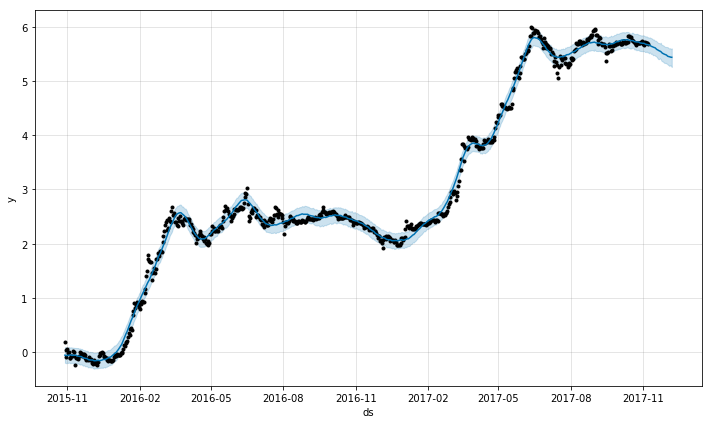

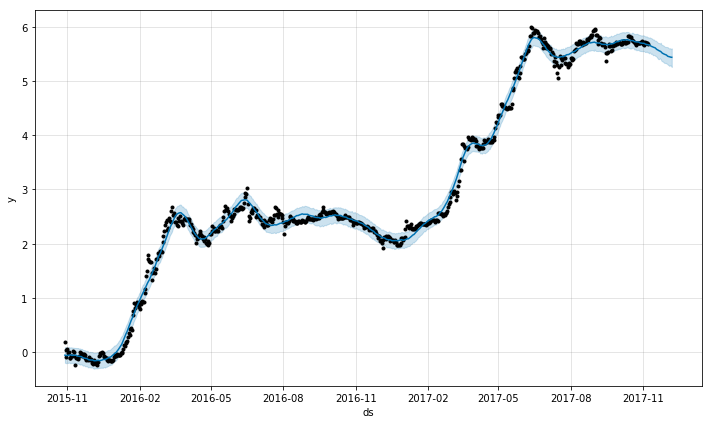

In [405]:
model.plot(forecast_data)

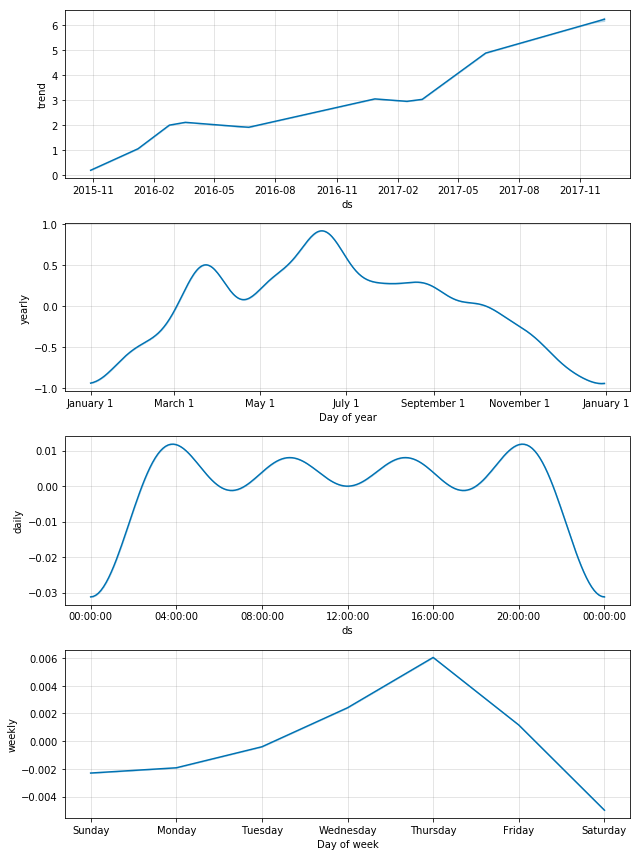

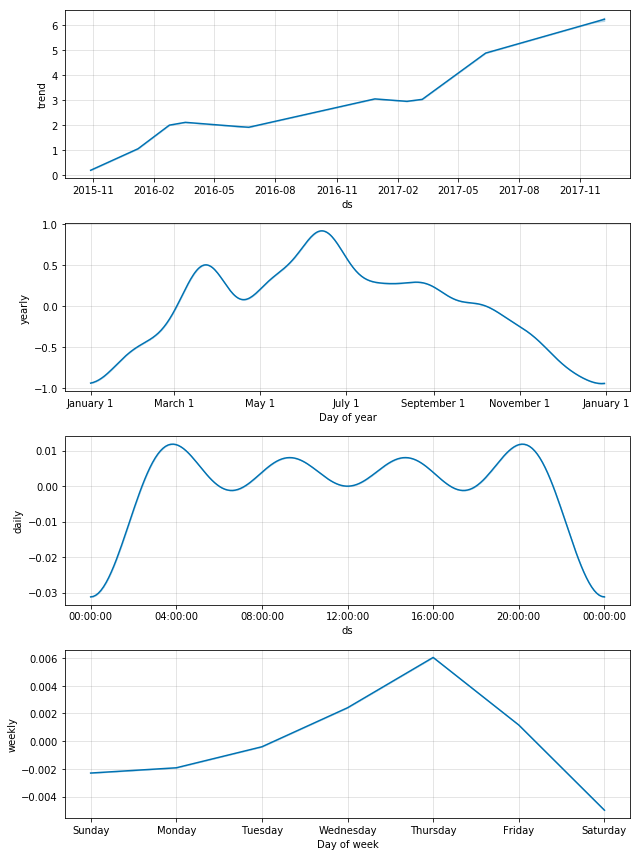

In [406]:
model.plot_components(forecast_data)

In [407]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
def fbProphet(data):
    dataProphet = data
    dataProphet = dataProphet.reset_index()
    dataProphetRed = dataProphet[['Date', 'Close']]
    dataProphetRed = dataProphetRed.rename(columns={"Date": "ds", "Close": "y"})
    dataProphetRed['y_orig'] = dataProphetRed['y'] # to save a copy of the original data
    #log transform y
    dataProphetRed['y'] = np.log(dataProphetRed['y'])
    splitIndex = int(np.floor(dataProphetRed.shape[0]*0.90))
    X_train_prophet, X_test_prophet = dataProphetRed[:splitIndex], dataProphetRed[splitIndex:]
    model=Prophet(yearly_seasonality=True, daily_seasonality=True)
    # model.fit(dataProphetRed)
    model.fit(X_train_prophet)
    test = X_test_prophet
    del test['y_orig']
    test.set_index('ds')
    prediction = model.predict(test)
    MSE = mean_squared_error(np.exp(test['y']), np.exp(prediction['yhat']))
    return MSE

In [409]:
for currency in currency_dict:
    original_data = currency_dict[currency]
    mse = fbProphet(original_data)
    print ("MSE using FB Prophet for " + currency + " :", mse)

('MSE using FB Prophet for litecoin :', 5.2932387542863957)
('MSE using FB Prophet for bitcoin :', 9657.2038283944967)
('MSE using FB Prophet for ethereum :', 0.13222348576736784)
('MSE using FB Prophet for ripple :', 0.014760522474841435)
('MSE using FB Prophet for monero :', 0.91728167577428166)
('MSE using FB Prophet for iota :', 0.033907283737127161)


## ARIMA Model

In [51]:
bitcoinDemo = currency_dict['bitcoin']
bitcoinDemoData = preprocess(bitcoinDemo)
bitcoinDemoData = bitcoinDemoData['Close']
X_train_arima, X_test_arima = split_data(bitcoinDemoData)

In [52]:
model = ARIMA(X_train_arima, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1488
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -8317.586
Method:                       css-mle   S.D. of innovations             64.770
Date:                Mon, 27 Nov 2017   AIC                          16643.172
Time:                        00:21:55   BIC                          16664.393
Sample:                    11-06-2017   HQIC                         16651.081
                         - 10-11-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.7055      1.769     -2.660      0.008      -8.172      -1.239
ar.L1.D.Close     0.0068      0.026      0.261      0.794      -0.044       0.058
ar.L2.D.Close     0.0441      0.026     

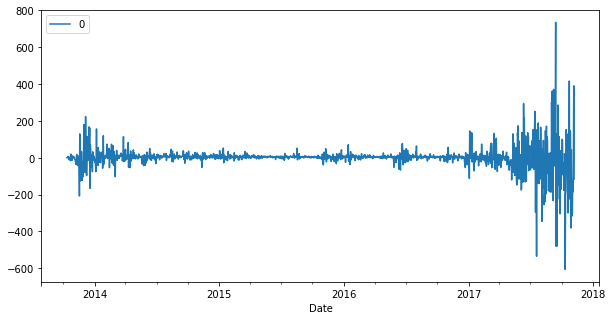

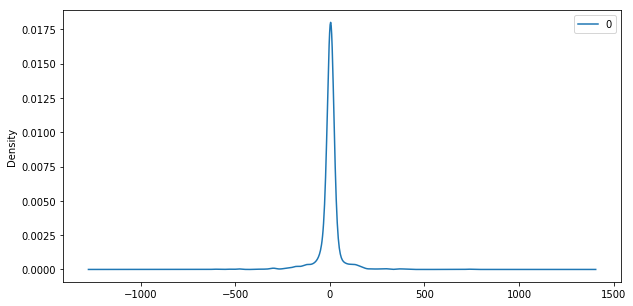

                 0
count  1488.000000
mean     -0.007375
std      64.793010
min    -606.474144
25%      -5.047708
50%       3.652189
75%       9.374548
max     734.816066


In [53]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Test MSE: 22.086


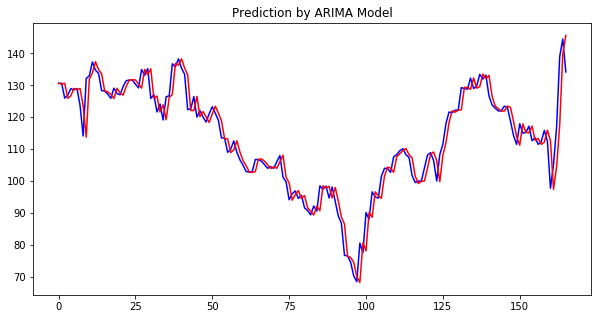

In [54]:
train = X_train_arima.values
test = X_test_arima.values
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(trend='nc', disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test, color='blue')
plt.plot(predictions, color='red')
plt.title("Prediction by ARIMA Model")
plt.show()

In [55]:
def arima(data):
    X_train_arima, X_test_arima = split_data(data)
    train = X_train_arima.values
    test = X_test_arima.values
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(2,1,0))
        model_fit = model.fit(trend='nc', disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    mse = mean_squared_error(test, predictions)
    return mse

for currency in currency_dict:
    original_data = currency_data[currency]
    data = preprocess(original_data)
    data = data['Close']
    mse = arima(data)
    print ("MSE using ARIMA for " + currency + " :", mse) 

('MSE using ARIMA for litecoin :', 0.018303859679353426)
('MSE using ARIMA for bitcoin :', 22.086164734934943)
('MSE using ARIMA for ethereum :', 0.062246043924520454)
('MSE using ARIMA for ripple :', 7.8061344094346925e-06)
('MSE using ARIMA for monero :', 0.095812394281236973)
('MSE using ARIMA for iota :', 0.0031022760509924704)
